In [34]:
import numpy as np
import pandas as pd

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
fontprop = fm.FontProperties(fname=font_path, size=15)
font_family = fm.FontProperties(fname=font_path).get_name()

plt.rcParams["font.family"] = font_family

- plot에 한글 표기하기


import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/NGULIM.TTF'

fontprop = fm.FontProperties(fname=font_path, size=15)

font_family = fm.FontProperties(fname=font_path).get_name()

plt.rcParams["font.family"] = font_family

import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/NGULIM.TTF'

font_family = fm.FontProperties(fname=font_path).get_name()

plt.rcParams["font.family"] = font_family

sex        F       M
year                
2008  191282  169063
2009  186337  166347
2010  195842  177375
2011  199164  180055
2012  204024  185399
2013  189671  173103
2014  187089  174520
2015  190049  178228
2016  176951  165692
2017  154957  148076
2018  144814  137774
2019  133687  128559


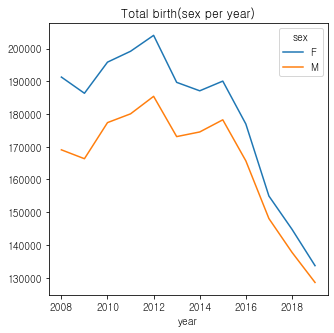

In [37]:
total_births = names_list.pivot_table('counts', index='year', columns='sex', aggfunc=sum)
print(total_births)
total_births.plot(title ='Total birth(sex per year)', figsize = (5,5))

In [38]:
def add_prop(group):
    group['prop'] = group.counts / group.counts.sum()
    return group

In [58]:
name_prop = names_list.groupby(['year','sex']).apply(add_prop)
name_prop

,name,sex,counts,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
11995,민희,F,43,2019,0.000322
11996,레아,F,43,2019,0.000322
11997,이랑,F,43,2019,0.000322
11998,가원,F,42,2019,0.000314


In [59]:
name_prop.groupby(['year','sex']).prop.sum()

year  sex
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
2019  F      1.0
      M      1.0
Name: prop, dtype: float64

In [60]:
def get_top10(group):
    return group.sort_values(by='counts', ascending=False)[:10]

In [63]:
grouped = name_prop.groupby(['year','sex'])
top10 = grouped.apply(get_top10)
top10

name sex  counts  year      prop
year sex                                       
2008 F   0       서연   F    3280  2008  0.017147
         1       민서   F    2873  2008  0.015020
         2       지민   F    2826  2008  0.014774
         3       서현   F    2606  2008  0.013624
         4       서윤   F    2484  2008  0.012986
...             ...  ..     ...   ...       ...
2019 M   11005   지호   M    1775  2019  0.013807
         11006   예준   M    1723  2019  0.013402
         11007   민준   M    1648  2019  0.012819
         11008   유준   M    1623  2019  0.012625
         11009   주원   M    1567  2019  0.012189

[240 rows x 5 columns]

In [64]:
top10.reset_index(inplace = True, drop = True)
top10

,name,sex,counts,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
235,지호,M,1775,2019,0.013807
236,예준,M,1723,2019,0.013402
237,민준,M,1648,2019,0.012819
238,유준,M,1623,2019,0.012625


In [66]:
total_births = name_prop.pivot_table('counts', index='year', columns='name', aggfunc=sum)

In [49]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2008 to 2019
Columns: 1220 entries, 가람 to 희찬
dtypes: float64(1220)
memory usage: 114.5 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016386AEAFD0>,
      dtype=object)

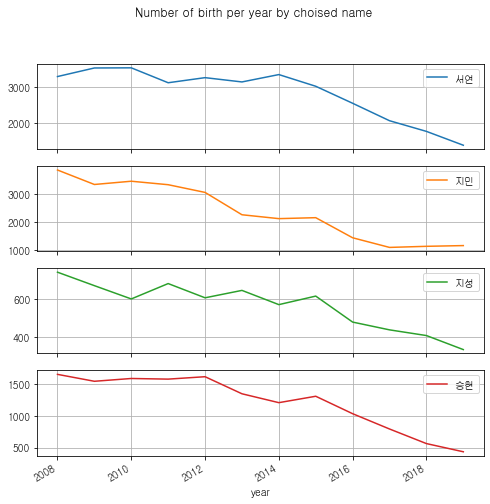

In [78]:
subset = total_births[['서연','지민','지성','승현']]
subset.plot(subplots=True, figsize=(8,8),grid=True, title = 'Number of birth per year by choised name')

<Figure size 432x288 with 0 Axes>

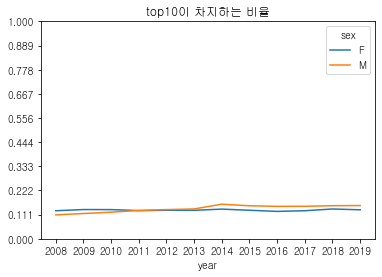

In [71]:
import matplotlib.pyplot as plt
plt.figure()
table = top10.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(title = 'top10이 차지하는 비율', yticks=np.linspace(0,1.0,10), xticks=range(2008,2020,1))

In [74]:
boys = name_prop[name_prop.sex == 'M']
girls = name_prop[name_prop.sex == 'F']

In [79]:
df = boys[boys.year == 2010]
df

,name,sex,counts,year,prop
2500,민준,M,3601,2010,0.020302
2501,지훈,M,2106,2010,0.011873
2502,예준,M,2076,2010,0.011704
2503,현우,M,2064,2010,0.011636
2504,지호,M,2058,2010,0.011603
...,...,...,...,...,...
2995,종호,M,92,2010,0.000519
2996,한별,M,92,2010,0.000519
2997,한빈,M,92,2010,0.000519
2998,선율,M,91,2010,0.000513


In [81]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)+1

86

In [88]:
df1 = boys[boys.year == 2019]
prop_cumsum2019 = df1.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum2019.values.searchsorted(0.5)+1

65

<Figure size 432x288 with 0 Axes>

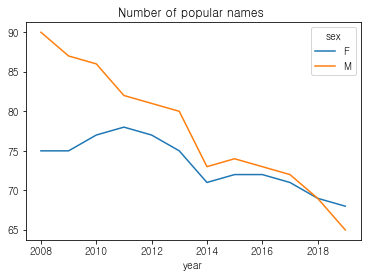

In [94]:
def get_quantille_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity = name_prop.groupby(['year','sex']).apply(get_quantille_count)
diversity = diversity.unstack('sex')
fig = plt.figure()
diversity.plot (title="Number of popular names ")